<h1>Naive Bayes</h1>

En esta notebook usaremos el algoritmo Naive Bayes para tareas de clasificación de texto.

Para esto, usaremos el corpus `20newsgroups`.

Algunos aspectos importantes a observar:

* Comparación del desempeño del NaiveBayes como algoritmo de clasificación con otros algoritmos.
* Interpretabilidad del modelo: palabras más representativas por clase.

# 🟥 Ejercicios Tarea

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
train_data = fetch_20newsgroups(subset='train',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball']
                                )
test_data = fetch_20newsgroups(subset='test',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball']
                               )

X_train_raw = train_data.data
y_train = train_data.target

X_test_raw = test_data.data
y_test = test_data.target

In [ ]:
all_data = fetch_20newsgroups(subset='all',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball']
                               )

X_all_raw = all_data.data
y_all = all_data.target

In [ ]:
accs = []
f1s = []

## 1. La implementación de scikit-learn de Naive Bayes tiene un parámetro para controlar el suavizado. Haz una busqueda de parámetros para obtener el *mejor* clasificador Naive Bayes que te sea posible.

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB()),
])

param_grid = [{
    'tfidf__max_features': [1000, 1500, 2000, 2500],
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
    }, {
        'tfidf__max_features': [1000, 1500, 2000, 2500],
        'clf__alpha': [0],
        'clf__force_alpha': [True]
    }]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_all_raw, y_all)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
                          'tfidf__max_features': [1000, 1500, 2000, 2500]},
                         {'clf__alpha': [0], 'clf__force_alpha': [True],
                          'tfidf__max_features': [1000, 1500, 2000, 2500]}],
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__alpha': 0.01, 'tfidf__max_features': 2500}
0.9500330763554945


In [ ]:
print(grid_search.best_estimator_)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=2500, stop_words='english')),
                ('clf', MultinomialNB(alpha=0.01))])


In [ ]:
best_model = grid_search.best_estimator_

best_model.fit(X_train_raw, y_train)
y_pred = best_model.predict(X_test_raw)

acc_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)

accs.append(acc_nb)
f1s.append(f1_nb)

print(f1_nb)
print(classification_report(y_test, y_pred))

0.9226869455006337
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       397
           1       0.92      0.92      0.92       394

    accuracy                           0.92       791
   macro avg       0.92      0.92      0.92       791
weighted avg       0.92      0.92      0.92       791



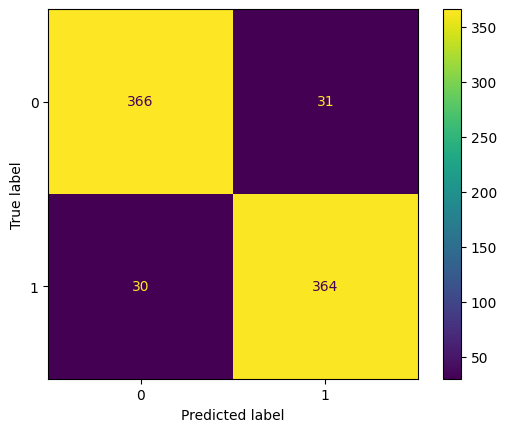

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 2. Usando cualquier clasificador clásico de Machine Learning de tu preferencia, busca supera el rendimiento del clasificador Naive Bayes. Escoge uno, ya sea que mejore o el que más se acerque al rendimiento del Naive Bayes.

In [ ]:
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier()),
])

param_grid = [{
    'tfidf__max_features': [1000, 1500, 2000, 2500],
    'clf__n_estimators': [10,100,200,300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [0.1, 2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4, 5],
    'clf__criterion': ['gini', 'entropy']
    }]

random_search = RandomizedSearchCV(rf_pipeline, param_grid, n_iter=200,cv=5, n_jobs=-1, verbose=1)
random_search.fit(X_all_raw, y_all)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(stop_words='english')),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'clf__criterion': ['gini', 'entropy'],
                                         'clf__max_depth': [None, 10, 20, 30],
                                         'clf__min_samples_leaf': [1, 2, 4, 5],
                                         'clf__min_samples_split': [0.1, 2, 5,
                                                                    10],
                                         'clf__n_estimators': [10, 100, 200,
                                                               300],
                                         'tfidf__max_features': [1000, 1500,
                                                                 2000, 2500]}],
                   verbose=1)

In [ ]:
print(random_search.best_params_)
print(random_search.best_score_)

{'tfidf__max_features': 2500, 'clf__n_estimators': 200, 'clf__min_samples_split': 0.1, 'clf__min_samples_leaf': 1, 'clf__max_depth': None, 'clf__criterion': 'entropy'}
0.9152087626898711


In [ ]:
best_model = random_search.best_estimator_

best_model.fit(X_train_raw, y_train)
y_pred = best_model.predict(X_test_raw)

acc_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

accs.append(acc_rf)
f1s.append(f1_rf)

print(f1_rf)
print(classification_report(y_test, y_pred))

0.8983957219251337
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       397
           1       0.95      0.85      0.90       394

    accuracy                           0.90       791
   macro avg       0.91      0.90      0.90       791
weighted avg       0.91      0.90      0.90       791



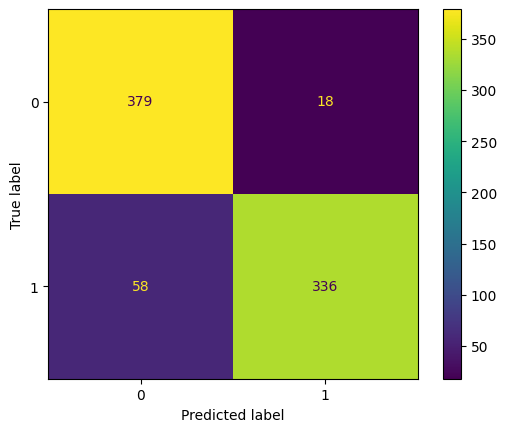

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## 3. Repite el ejercicio 2 usando un clasificador basado en una red neuronal. Reporta el mejor rendimiento.

In [ ]:
network_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MLPClassifier(max_iter=1000))
])

param_grid = [{
    'tfidf__max_features': [1000, 1500, 2000, 2500],
    'clf__hidden_layer_sizes': [(100,), (50, 50), (16, 16, 16)],
    'clf__activation': ['relu', 'tanh'],
    'clf__solver': ['adam'],
    'clf__alpha': [0.0001, 0.001, 0.01]
}]

grid_search_nn = GridSearchCV(network_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_nn.fit(X_all_raw, y_all)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MLPClassifier(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'clf__activation': ['relu', 'tanh'],
                          'clf__alpha': [0.0001, 0.001, 0.01],
                          'clf__hidden_layer_sizes': [(100,), (50, 50),
                                                      (16, 16, 16)],
                          'clf__solver': ['adam'],
                          'tfidf__max_features': [1000, 1500, 2000, 2500]}],
             verbose=1)

In [ ]:
print(grid_search_nn.best_params_)
print(grid_search_nn.best_score_)

{'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (16, 16, 16), 'clf__solver': 'adam', 'tfidf__max_features': 2500}
0.9369119405643336


In [ ]:
best_model = grid_search_nn.best_estimator_

best_model.fit(X_train_raw, y_train)
y_pred = best_model.predict(X_test_raw)

acc_nn = accuracy_score(y_test, y_pred)
f1_nn = f1_score(y_test, y_pred)

accs.append(acc_nn)
f1s.append(f1_nn)

print(f1_nn)
print(classification_report(y_test, y_pred))

0.9250645994832042
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       397
           1       0.94      0.91      0.93       394

    accuracy                           0.93       791
   macro avg       0.93      0.93      0.93       791
weighted avg       0.93      0.93      0.93       791



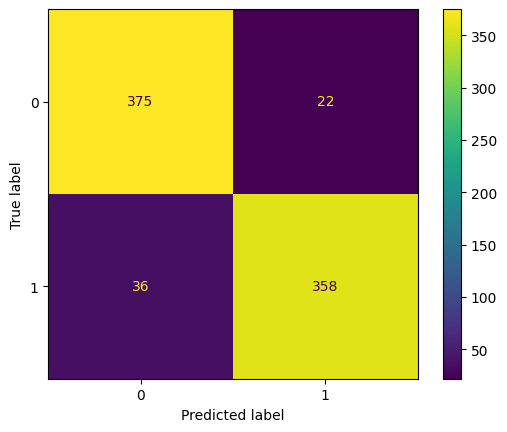

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## En los tres casos, usa el F1 score. Compara los 3 resultados en un gráfico similar al que hicimos en esta notebook.

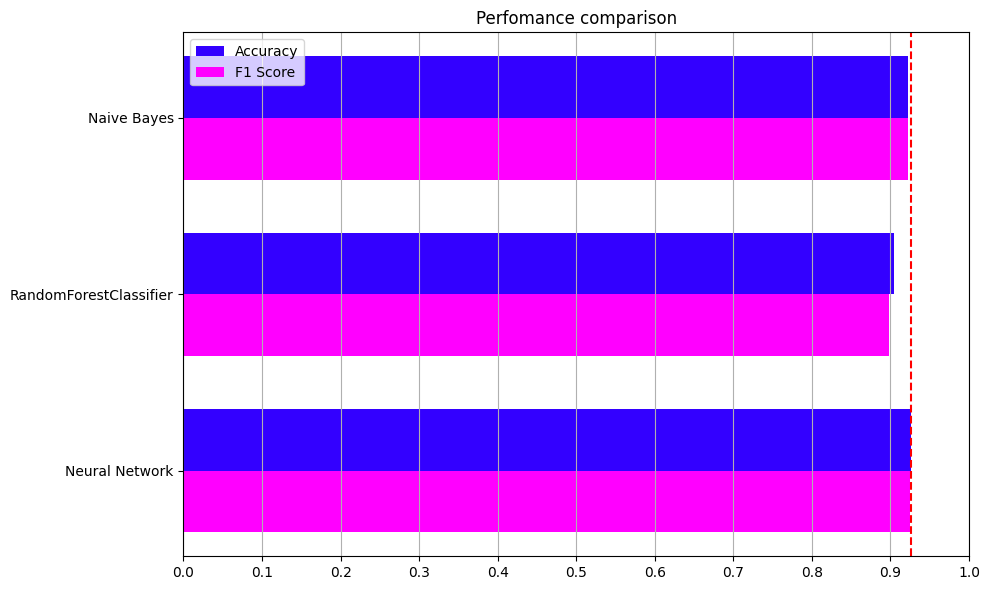

In [ ]:
names = ['Naive Bayes', 'RandomForestClassifier', 'Neural Network']

y = np.arange(len(names))
height = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y - height/2, accs, height, label='Accuracy', color='#3300FF')
ax.barh(y + height/2, f1s, height, label='F1 Score', color='#FF00FF')

ax.set_yticks(y)
ax.set_yticklabels(names)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_title('Perfomance comparison')
ax.legend(loc='best')
ax.axvline(x=max(accs), color='r', linestyle='--')
ax.grid(axis = 'x')

plt.tight_layout()
plt.show()

## 4. Repite los experimentos 1-3 con un nuevo corpus. Este corpus son 50K reviews de IMDB, es una tarea de análisis de sentimientos.

In [ ]:
data = pd.read_csv("IMDB.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
X = data['review']
y = data['sentiment']

X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
accs_imdb = []
f1s_imdb = []

### Clasificador Naive-Bayes

In [ ]:
nb_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

param_grid = [{
    'tfidf__max_features': [1000, 1500, 2000, 2500],
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
    }, {
        'tfidf__max_features': [1000, 1500, 2000, 2500],
        'clf__alpha': [0],
        'clf__force_alpha': [True]
    }]

grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
                          'tfidf__max_features': [1000, 1500, 2000, 2500]},
                         {'clf__alpha': [0], 'clf__force_alpha': [True],
                          'tfidf__max_features': [1000, 1500, 2000, 2500]}],
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__alpha': 10, 'tfidf__max_features': 2500}
0.84886


In [ ]:
best_model = grid_search.best_estimator_

best_model.fit(X_train_imdb, y_train_imdb)
y_pred = best_model.predict(X_test_imdb)

acc_nb = accuracy_score(y_test_imdb, y_pred)
f1_nb = f1_score(y_test_imdb, y_pred)

accs_imdb.append(acc_nb)
f1s_imdb.append(f1_nb)

print(f1_nb)
print(classification_report(y_test_imdb, y_pred))

0.853077759114712
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



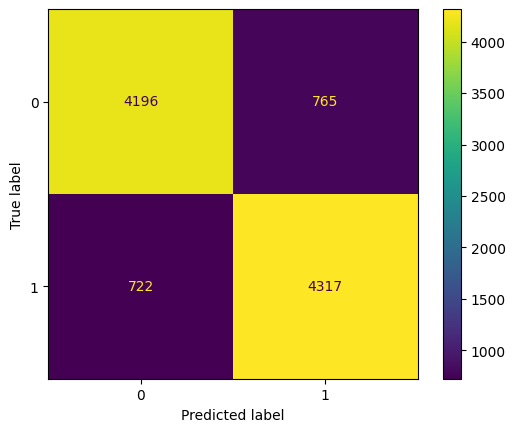

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_imdb, y_pred)

### Clasificador RandomForest

In [ ]:
rfc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier())
])

param_grid = [{
    'tfidf__max_features': [2000, 2500],
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None],
    'clf__min_samples_split': [0.1],
    'clf__min_samples_leaf': [1],
    'clf__criterion': ['entropy']
    }]

grid_search_rfc = GridSearchCV(rfc_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rfc.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf__criterion': ['entropy'],
                          'clf__max_depth': [None],
                          'clf__min_samples_leaf': [1],
                          'clf__min_samples_split': [0.1],
                          'clf__n_estimators': [100, 200],
                          'tfidf__max_features': [2000, 2500]}],
             verbose=2)

In [ ]:
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

{'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.1, 'clf__n_estimators': 200, 'tfidf__max_features': 2500}
0.82568


In [ ]:
best_model = grid_search_rfc.best_estimator_

best_model.fit(X_train_imdb, y_train_imdb)
y_pred = best_model.predict(X_test_imdb)

acc_rf = accuracy_score(y_test_imdb, y_pred)
f1_rf = f1_score(y_test_imdb, y_pred)

accs_imdb.append(acc_rf)
f1s_imdb.append(f1_rf)

print(f1_rf)
print(classification_report(y_test_imdb, y_pred))

0.8283458426747247
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4961
           1       0.81      0.84      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



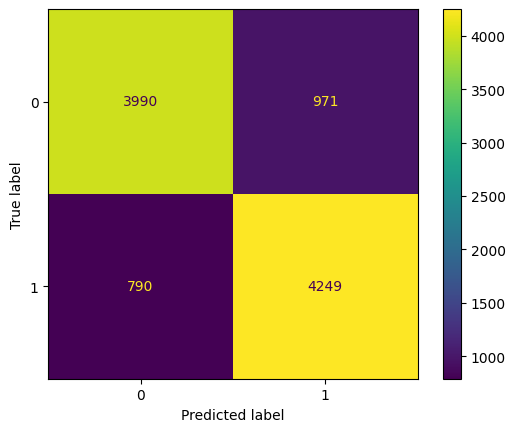

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_imdb, y_pred)

### Clasifidor de Redes Neuronales

In [ ]:
nn_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MLPClassifier())
])

param_grid = [{
    'tfidf__max_features': [2000, 2500],
    'clf__hidden_layer_sizes': [(100,), (50, 50), (16, 16, 16)],
    'clf__activation': ['relu'],
    'clf__solver': ['adam'],
    'clf__alpha': [0.001, 0.01]
}]

grid_search_nn = GridSearchCV(nn_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_nn.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf', MLPClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf__activation': ['relu'],
                          'clf__alpha': [0.001, 0.01],
                          'clf__hidden_layer_sizes': [(100,), (50, 50),
                                                      (16, 16, 16)],
                          'clf__solver': ['adam'],
                          'tfidf__max_features': [2000, 2500]}],
             verbose=1)

In [ ]:
print(grid_search_nn.best_params_)
print(grid_search_nn.best_score_)

{'clf__activation': 'relu', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (100,), 'clf__solver': 'adam', 'tfidf__max_features': 2500}
0.87324


In [ ]:
best_model = grid_search_nn.best_estimator_

best_model.fit(X_train_imdb, y_train_imdb)
y_pred = best_model.predict(X_test_imdb)

acc_nn = accuracy_score(y_test_imdb, y_pred)
f1_nn = f1_score(y_test_imdb, y_pred)

accs_imdb.append(acc_nn)
f1s_imdb.append(f1_nn)

print(f1_nn)
print(classification_report(y_test_imdb, y_pred))

0.8794312426957538
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4961
           1       0.86      0.90      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



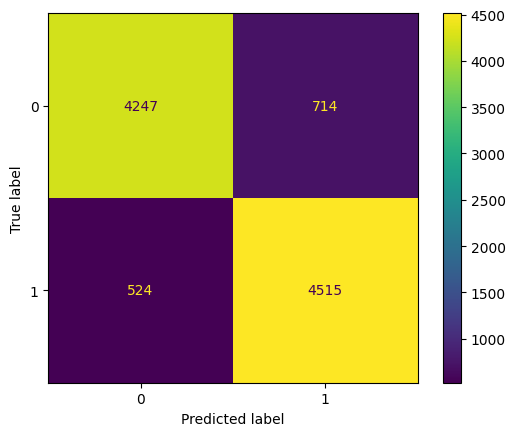

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_imdb, y_pred)

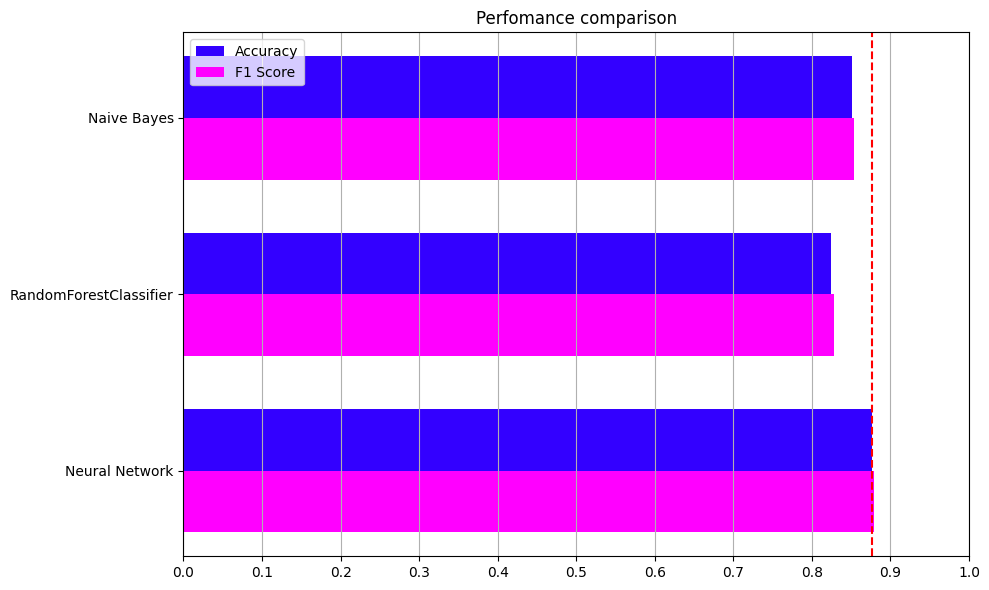

In [ ]:
names = ['Naive Bayes', 'RandomForestClassifier', 'Neural Network']

y = np.arange(len(names))
height = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y - height/2, accs_imdb, height, label='Accuracy', color='#3300FF')
ax.barh(y + height/2, f1s_imdb, height, label='F1 Score', color='#FF00FF')

ax.set_yticks(y)
ax.set_yticklabels(names)
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.set_title('Perfomance comparison')
ax.legend(loc='best')
ax.axvline(x=max(accs_imdb), color='r', linestyle='--')
ax.grid(axis = 'x')

plt.tight_layout()
plt.show()

## 5. Con la experiencia ganada con esta notebook y estos experimentos. Responde lo siguiente ¿qué opinas sobre el papel del algoritmo Naive Bayes en la clasificación de texto? ¿qué ventajas y desventajas observas?

En la clasificacion de texto, podemos concluir que el algoritmo Naive Bayes puede ser una herramienta muy completa para la tarea. Con las pruebas que realicé en estos ejercicios se puede observar que el algoritmo puede llegar a ser casi tan eficaz como una red neuronal, o incluso mejor en algunos casos.

La ventaja más evidente de este algoritmo es su facilidad de interpretación y de implementación. Al ser un algoritmo basado en el teorema de Bayes, se puede comprender más facilmente como funciona, y a la vez darle una mejor interpretación a sus resultados. Además, también es un algoritmo mucho mas eficiente y rápido que otros. En este caso, el entrenamiento y procesamiento del algoritmo fue mucho más rapido que el de los otros dos (Random Forest y Neural Network), pero dando resultados igual de buenos (o hasta mejor) que ellos.

Una desventaja de este algoritmo, aunque no tan evidente, puede ser el problema procesar palabras nuevas o no vistas durante el entrenamiento, lo que puede ocasionar un valor de probabilidad igual a cero, pero esto se puede contrarrestar con el suavizado de Laplace (que puede ser controlado/modificado con el paramétro `alpha` del modelo que definamos).